# Spectractor Launcher

Goal is to process a series of images in order to produce spectra

- author Sylvie Dagoret-Campagne
- date : March 29th 2018


In [1]:
theNotebook="Run_Spectractor"

# Spectractor Launcher

In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

## Required packages 

In [3]:
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),   #defines the default image size
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
plt.rcParams.update({'figure.max_open_warning': 0}) # to see a large number of files

## Tools

In [7]:
#sys.path.append("../common_tools/")
#from common_notebook import *
#init_notebook()

## Spectractor 

In [8]:
PATH_SPECTRACTOR='../../Spectractor'

In [9]:
sys.path.append(PATH_SPECTRACTOR)

In [10]:
from spectractor import *

In [11]:
from tools import *
from holo_specs import *
from targets import *
from optics import *
import parameters 

# Configuration

## Input Directory

### HD111980 is missing in logbook

In [12]:
if 0:
    inputdir="/sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17"
    MIN_IMGNUMBER=58
    #MAX_IMGNUMBER=80  # temporary
    MAX_IMGNUMBER=190
    date="20170530"
    object_name='HD111980'
    tag = "reduc"
    SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
    SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
    NBIMGPERROW=2
    subdir=os.path.basename(inputdir)

### So use HD205905

In [13]:
inputdir="/sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17"
MIN_IMGNUMBER=208
MAX_IMGNUMBER=284
date="20170530"
object_name='HD205905'
tag = "reduc"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2
subdir=os.path.basename(inputdir)

# Output directory

In [14]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory
outputdir="./spectra"
#ensure_dir(outputdir)

In [15]:
#infile_fullpath=os.path.join(PATH_SPECTRACTOR,infile)

In [16]:
sys.path.append(PATH_SPECTRACTOR)

In [17]:
from spectractor import *

# Logbook

In [18]:
file_logbook_csv='../common_info/ctiofulllogbook_jun2017_v3.csv'
file_logbook_xlsx='../common_info/ctiofulllogbook_jun2017_v3.xlsx'

In [19]:
#df=pd.read_csv(file_logbook_csv,index_col=0)
df=pd.read_excel(file_logbook_xlsx,index_col=0)

In [20]:
df.head()

,date,subdir,index,object,filter,disperser,airmass,exposure,focus,seeing,...,T,RH,W,file,Obj-posXpix,Obj-posYpix,Dx,Dy,comment,skip
215,2017-05-30T21:17:00.652,data_30may17,1,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.6,36,5.6,reduc_20170630_001.fits,NaN,NaN,NaN,NaN,NaN,NaN
147,2017-05-30T21:17:44.185,data_30may17,2,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.6,36,5.6,reduc_20170630_002.fits,NaN,NaN,NaN,NaN,NaN,NaN
13,2017-05-30T21:18:27.708,data_30may17,3,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.9,reduc_20170630_003.fits,NaN,NaN,NaN,NaN,NaN,NaN
45,2017-05-30T21:19:11.234,data_30may17,4,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.7,reduc_20170630_004.fits,NaN,NaN,NaN,NaN,NaN,NaN
218,2017-05-30T21:19:54.772,data_30may17,5,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.7,reduc_20170630_005.fits,NaN,NaN,NaN,NaN,NaN,NaN


# Extract the relevant data and sort by the column index

In [21]:
all_obs=df.loc[(df["subdir"]==subdir) & (df["object"]==object_name),:].sort_values(by=['index'])

In [22]:
all_obs.head()

,date,subdir,index,object,filter,disperser,airmass,exposure,focus,seeing,...,T,RH,W,file,Obj-posXpix,Obj-posYpix,Dx,Dy,comment,skip
71,2017-05-31T07:54:38.806,data_30may17,210,HD205905,dia,Ron400,1.101,60.0,12400,0.793,...,9.5,23,11.6,reduc_20170530_210.fits,790.0,700.0,100.0,100.0,NaN,NaN
39,2017-05-31T07:56:31.293,data_30may17,211,HD205905,dia,Thor300,1.097,60.0,12400,0.793,...,9.4,24,11.5,reduc_20170530_211.fits,790.0,700.0,100.0,100.0,NaN,NaN
5,2017-05-31T07:58:23.653,data_30may17,212,HD205905,dia,HoloPhP,1.094,60.0,12400,0.793,...,9.5,24,10.5,reduc_20170530_212.fits,790.0,700.0,100.0,100.0,NaN,NaN
110,2017-05-31T08:00:16.053,data_30may17,213,HD205905,dia,HoloPhAg,1.090,120.0,12400,0.793,...,9.7,23,12.0,reduc_20170530_213.fits,790.0,700.0,100.0,100.0,NaN,NaN
149,2017-05-31T08:03:08.495,data_30may17,214,HD205905,dia,HoloAmAg,1.085,120.0,12400,0.793,...,9.6,23,13.4,reduc_20170530_214.fits,790.0,700.0,100.0,100.0,NaN,NaN


# Extract relevant info for Spectractor

In [23]:
filex0y0dxdy=all_obs[['file','Obj-posXpix','Obj-posYpix','Dx','Dy']]

In [24]:
filex0y0dxdy.head()

,file,Obj-posXpix,Obj-posYpix,Dx,Dy
71,reduc_20170530_210.fits,790.0,700.0,100.0,100.0
39,reduc_20170530_211.fits,790.0,700.0,100.0,100.0
5,reduc_20170530_212.fits,790.0,700.0,100.0,100.0
110,reduc_20170530_213.fits,790.0,700.0,100.0,100.0
149,reduc_20170530_214.fits,790.0,700.0,100.0,100.0


### Setting the parameters of Spectractor

In [25]:
 parameters.DEBUG = False
parameters.VERBOSE = True

2018-03-29 15:16:01  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:16:01  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_210.fits...


spectrum  71


2018-03-29 15:16:02  Image      load                 INFO   
	Image loaded
2018-03-29 15:16:02  Image      load                 INFO   
	Loading disperser Ron400...


Load disperser Ron400:
	from ../../Spectractor/dispersers/Ron400
Grating characteristics:
	N = 400.87 +/- 1.28 grooves/mm
	Average tilt of -0.3 degrees
 MAIN_ID        RA           DEC      ... SP_TYPE  SP_QUAL      SP_BIBCODE    
             "h:m:s"       "d:m:s"    ...                                     
--------- ------------- ------------- ... -------- ------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ... G1.5IV-V       C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits


2018-03-29 15:16:03  spectractor Spectractor          INFO   
	Search for the target in the image...


Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


../../Spectractor/spectractor.py:130: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_image = np.copy(self.data[y0-Dy:y0+Dy,x0-Dx:x0+Dx])
2018-03-29 15:16:03  Image      find_target          INFO   
	X,Y target position in pixels: 777.818,697.119
2018-03-29 15:16:03  Image      compute_rotation_angle_hessian WARNING 
	Interpolated angle and fitted angle disagrees with more than 10 pixels over 2048 pixels:  -0.74 vs -0.28
2018-03-29 15:16:03  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.74 degree
2018-03-29 15:16:06  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:16:06  Image      find_target          INFO   
	X,Y target position in pixels: 794.866,707.291
2018-03-29 15:16:06  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-2

   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366  367.396 -25.9695  16.485  -12.7295 19.5953
$Ca_{II}$   396.847  392.475 -4.37152  16.485  -15.7528 24.2493
$H\gamma$     434.0  438.716  4.71578 6.64863  -4.94538 7.61274
 $H\beta$     486.3  475.075 -11.2254  16.485  -4.76719 7.33844
$H\alpha$     656.3  660.933  4.63308 7.34239  -3.47304 3.50441
 $O_2(B)$   686.719  699.941  13.2225  16.485  -3.95947 3.99522
    $O_2$     762.1  771.654   9.5539  16.485  -10.7481 13.0012
  $H_2 O$     950.0  958.341  8.34108 14.3923  -1.04822  3.4204


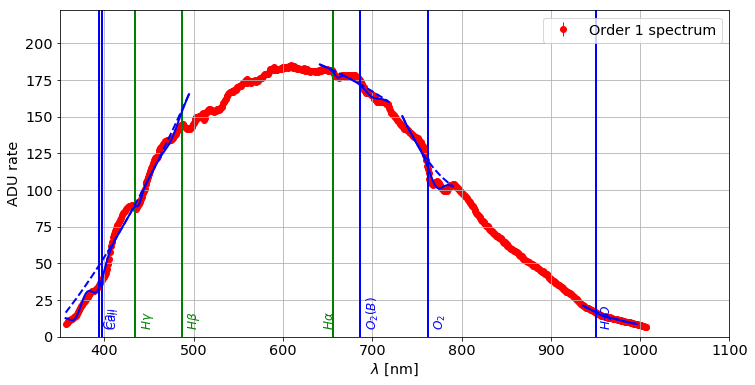

2018-03-29 15:16:10  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_210_spectrum.fits
2018-03-29 15:16:10  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:16:10  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_211.fits...
2018-03-29 15:16:10  Image      load                 INFO   
	Image loaded
2018-03-29 15:16:10  Image      load                 INFO   
	Loading disperser Thor300...


spectrum  39
Load disperser Thor300:
	from ../../Spectractor/dispersers/Thor300
Grating characteristics:
	N = 299.51 +/- 0.99 grooves/mm
	Average tilt of -0.6 degrees


2018-03-29 15:16:11  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_2     SP_BIBCODE_2   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:16:11  Image      find_target          INFO   
	X,Y target position in pixels: 778.827,699.007
2018-03-29 15:16:11  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.71 degree
2018-03-29 15:16:13  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:16:14  Image      find_target          INFO   
	X,Y target position in pixels: 795.441,709.374
2018-03-29 15:16:14  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:16:14  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:16:14  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:16:17  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: -0.40nm (after 30 steps)
	with D = 55.72 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, 1.4 sigma shift)


 Line Tabulated Detected Shift    FWHM  Amplitude   SNR  
          nm       nm      nm      nm                    
----- --------- -------- ------ ------- --------- -------
$O_2$     762.1  764.295 2.1952 11.7683  -38.4935 17.2154


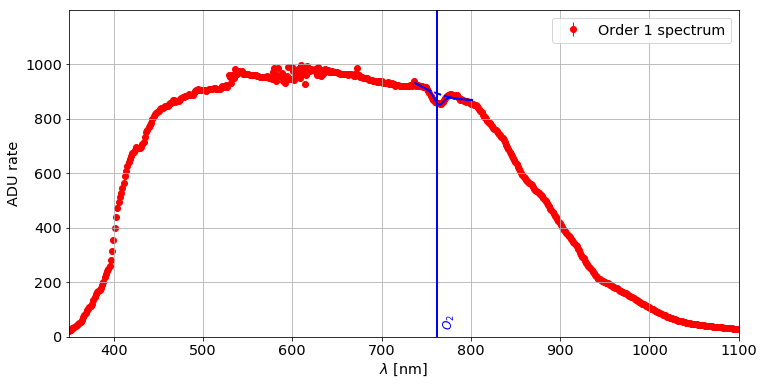

2018-03-29 15:16:17  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_211_spectrum.fits
2018-03-29 15:16:17  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:16:17  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_212.fits...


spectrum  5


2018-03-29 15:16:17  Image      load                 INFO   
	Image loaded
2018-03-29 15:16:17  Image      load                 INFO   
	Loading disperser HoloPhP...


Load disperser HoloPhP:
	from ../../Spectractor/dispersers/HoloPhP
Hologram characteristics:
	N = 355.08 +/- 1.15 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.0 degrees
	Hologram center at x0 = 856.0 and y0 = 562.3 with average tilt of -1.0 degrees
Order  0 position at x0 = 590.7 and y0 = 567.2
Order +1 position at x0 = 1121.3 and y0 = 557.5
Distance between the orders: 530.76 pixels (12.74 mm)


2018-03-29 15:16:18  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_3     SP_BIBCODE_3   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:16:18  Image      find_target          INFO   
	X,Y target position in pixels: 778.238,698.155
2018-03-29 15:16:18  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.96 degree
2018-03-29 15:16:20  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:16:20  Image      find_target          INFO   
	X,Y target position in pixels: 800.409,711.111
2018-03-29 15:16:20  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:16:21  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:16:21  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:16:22  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: 6.90nm (after 13 steps)
	with D = 54.92 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, -2.8 sigma shift)


   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366  385.267   -8.099  16.485  -30.4569  30.016
$Ca_{II}$   396.847  393.476 -3.37111 5.13662  -27.0416 26.6502
$H\delta$     410.2  399.798 -10.4019 5.60864  -31.6308 31.1729
 $H\beta$     486.3  503.755   17.455 16.4844  -27.8016 27.3992
$H\alpha$     656.3  663.879  7.57928 11.3763  -7.95362 7.62351
    $O_2$     762.1  769.575  7.47501  16.485  -29.9417  28.699
  $H_2 O$     950.0   945.07 -4.92948 28.0175  -2.08633 6.25632


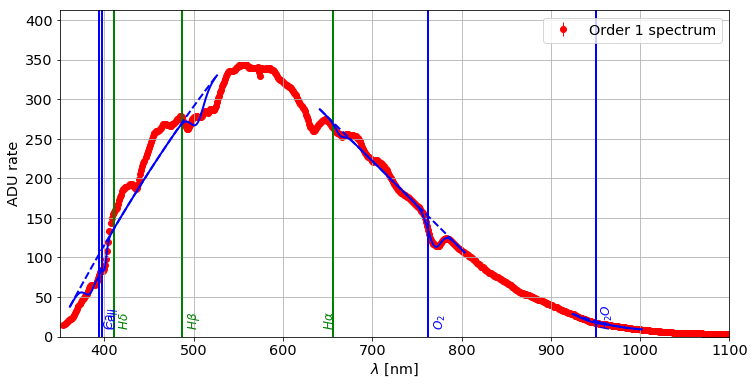

2018-03-29 15:16:22  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_212_spectrum.fits
2018-03-29 15:16:22  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:16:22  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_213.fits...
2018-03-29 15:16:23  Image      load                 INFO   
	Image loaded
2018-03-29 15:16:23  Image      load                 INFO   
	Loading disperser HoloPhAg...


spectrum  110
Load disperser HoloPhAg:
	from ../../Spectractor/dispersers/HoloPhAg
Hologram characteristics:
	N = 348.76 +/- 1.13 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1044.2 and y0 = 606.7 with average tilt of -1.9 degrees
Order  0 position at x0 = 779.6 and y0 = 614.7
Order +1 position at x0 = 1308.7 and y0 = 598.7
Distance between the orders: 529.36 pixels (12.70 mm)


2018-03-29 15:16:23  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_4     SP_BIBCODE_4   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:16:23  Image      find_target          INFO   
	X,Y target position in pixels: 779.350,697.496
2018-03-29 15:16:23  Image      compute_rotation_angle_hessian WARNING 
	Interpolated angle and fitted angle disagrees with more than 10 pixels over 2048 pixels:  -1.98 vs -1.52
2018-03-29 15:16:23  Image      turn_image           INFO   
	Rotate the image with angle theta=-1.98 degree
2018-03-29 15:16:26  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:16:26  Image      find_target          INFO   
	X,Y target position in pixels: 824.546,724.346
2018-03-29 15:16:26  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:16:26  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:16:26  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:16:27  S

   Line   Tabulated Detected   Shift     FWHM  Amplitude   SNR  
              nm       nm        nm       nm                    
--------- --------- -------- --------- ------- --------- -------
$H\gamma$     434.0  432.595  -1.40502 12.6058  -21.0215 29.8481
 $H\beta$     486.3  488.808   2.50831 4.49295  -12.4088 17.6191
$H\alpha$     656.3  655.955 -0.345312 4.87856  -10.2396 15.8605
 $O_2(B)$   686.719  689.184    2.4652 5.79069  -12.2129  18.917
    $O_2$     762.1  761.834 -0.265613 7.55578  -32.8906 63.1082
 $O_2(Y)$   898.765  906.743   7.97761 5.49239  -2.33967 5.23751
  $H_2 O$     950.0  961.433   11.4334   68.68  -4.19609 10.3179
  $H_2 O$     970.0  963.496  -6.50353 15.1521  -4.41744 10.8622


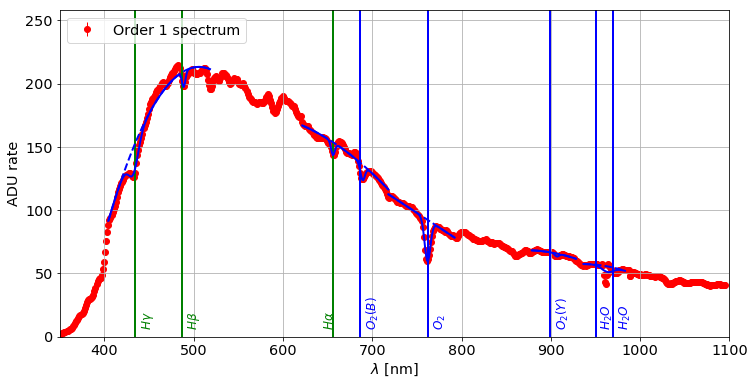

2018-03-29 15:16:28  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_213_spectrum.fits
2018-03-29 15:16:28  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:16:28  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_214.fits...
2018-03-29 15:16:28  Image      load                 INFO   
	Image loaded
2018-03-29 15:16:28  Image      load                 INFO   
	Loading disperser HoloAmAg...


spectrum  149
Load disperser HoloAmAg:
	from ../../Spectractor/dispersers/HoloAmAg
Hologram characteristics:
	N = 348.73 +/- 1.14 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1070.9 and y0 = 586.1 with average tilt of -1.9 degrees
Order  0 position at x0 = 805.1 and y0 = 595.0
Order +1 position at x0 = 1336.6 and y0 = 577.3
Distance between the orders: 531.79 pixels (12.76 mm)


2018-03-29 15:16:28  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_5     SP_BIBCODE_5   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:16:28  Image      find_target          INFO   
	X,Y target position in pixels: 778.822,697.406
2018-03-29 15:16:28  Image      turn_image           INFO   
	Rotate the image with angle theta=-1.46 degree
2018-03-29 15:16:30  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:16:31  Image      find_target          WARNING 
	X position determination of the target probably wrong
2018-03-29 15:16:31  Image      find_target          INFO   
	X,Y target position in pixels: 812.840,716.776
2018-03-29 15:16:31  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:16:31  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:16:31  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:16:31  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght t

   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366  370.133 -23.2327  16.485 -0.629309 3.72222
$Ca_{II}$   396.847  389.264 -7.58334  16.485  -1.47013  8.6955
$H\delta$     410.2   405.19 -5.01043  16.485   -1.4411 8.52378
$H\gamma$     434.0  428.759 -5.24147 16.4848  -1.74837 10.3412
$H\alpha$     656.3  656.529  0.22884 5.21946   -3.4244 8.32662
 $O_2(B)$   686.719  689.149  2.42978 6.14641  -4.85054 11.7944
    $O_2$     762.1  762.908 0.808145 8.65286  -16.6672 45.9012


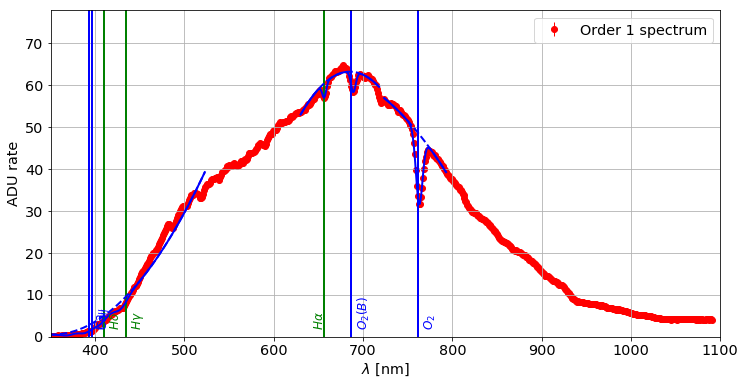

2018-03-29 15:16:32  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_214_spectrum.fits
2018-03-29 15:16:32  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:16:32  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_215.fits...
2018-03-29 15:16:32  Image      load                 INFO   
	Image loaded
2018-03-29 15:16:32  Image      load                 INFO   
	Loading disperser Ron400...


spectrum  216
Load disperser Ron400:
	from ../../Spectractor/dispersers/Ron400
Grating characteristics:
	N = 400.87 +/- 1.28 grooves/mm
	Average tilt of -0.3 degrees


2018-03-29 15:16:32  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_6     SP_BIBCODE_6   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:16:33  Image      find_target          INFO   
	X,Y target position in pixels: 778.406,697.377
2018-03-29 15:16:33  Image      compute_rotation_angle_hessian WARNING 
	Interpolated angle and fitted angle disagrees with more than 10 pixels over 2048 pixels:  -0.67 vs -0.28
2018-03-29 15:16:33  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.67 degree
2018-03-29 15:16:35  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:16:35  Image      find_target          INFO   
	X,Y target position in pixels: 794.088,706.867
2018-03-29 15:16:35  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:16:35  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:16:35  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:16:36  S

  Line   Tabulated Detected   Shift     FWHM  Amplitude   SNR  
             nm       nm        nm       nm                    
-------- --------- -------- --------- ------- --------- -------
$H\beta$     486.3  485.994  -0.30603 7.62749  -3.26291 4.92816
$O_2(B)$   686.719  689.883   3.16378 14.9136  -3.24589 3.42969
   $O_2$     762.1  761.767 -0.332797  16.485   -8.6096 11.2634


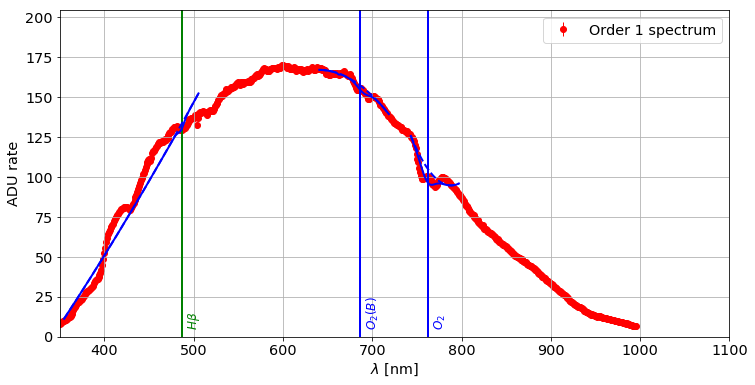

2018-03-29 15:16:37  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_215_spectrum.fits
2018-03-29 15:16:37  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:16:37  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_216.fits...


spectrum  97


2018-03-29 15:16:37  Image      load                 INFO   
	Image loaded
2018-03-29 15:16:37  Image      load                 INFO   
	Loading disperser Thor300...


Load disperser Thor300:
	from ../../Spectractor/dispersers/Thor300
Grating characteristics:
	N = 299.51 +/- 0.99 grooves/mm
	Average tilt of -0.6 degrees


2018-03-29 15:16:37  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_7     SP_BIBCODE_7   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:16:38  Image      find_target          INFO   
	X,Y target position in pixels: 778.004,698.788
2018-03-29 15:16:38  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.69 degree
2018-03-29 15:16:40  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:16:40  Image      find_target          INFO   
	X,Y target position in pixels: 794.585,708.673
2018-03-29 15:16:40  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:16:40  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:16:40  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:16:41  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: -8.57nm (after 6 steps)
	with D = 56.40 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, 5.0 sigma shift)


   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
 $H\beta$     486.3  489.377  3.07684 12.6567  -12.1052 7.18661
$H\alpha$     656.3  686.467  30.1667  16.485   -47.414 22.2285
 $O_2(B)$   686.719  717.686  30.9672  16.485  -70.7789 33.1824
    $O_2$     762.1  752.063 -10.0369  16.485  -87.0761 40.8228
  $H_2 O$     950.0  937.426 -12.5743 47.8642  -44.3269 32.3711


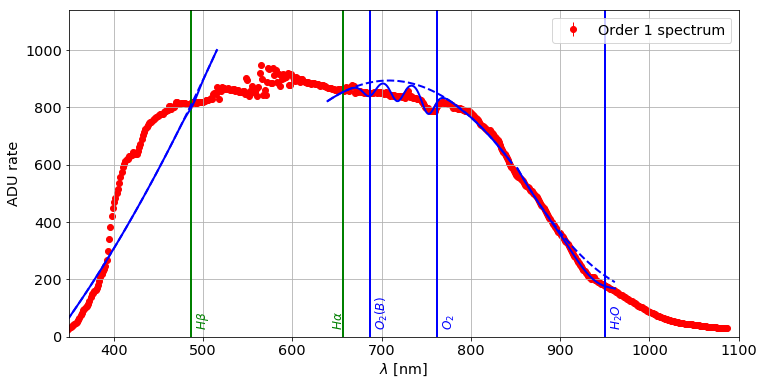

2018-03-29 15:16:41  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_216_spectrum.fits
2018-03-29 15:16:41  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:16:41  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_217.fits...
2018-03-29 15:16:41  Image      load                 INFO   
	Image loaded
2018-03-29 15:16:41  Image      load                 INFO   
	Loading disperser HoloPhP...


spectrum  136
Load disperser HoloPhP:
	from ../../Spectractor/dispersers/HoloPhP
Hologram characteristics:
	N = 355.08 +/- 1.15 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.0 degrees
	Hologram center at x0 = 856.0 and y0 = 562.3 with average tilt of -1.0 degrees
Order  0 position at x0 = 590.7 and y0 = 567.2
Order +1 position at x0 = 1121.3 and y0 = 557.5
Distance between the orders: 530.76 pixels (12.74 mm)


2018-03-29 15:16:42  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_8     SP_BIBCODE_8   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:16:42  Image      find_target          INFO   
	X,Y target position in pixels: 778.570,697.116
2018-03-29 15:16:42  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.94 degree
2018-03-29 15:16:44  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:16:44  Image      find_target          INFO   
	X,Y target position in pixels: 800.318,709.649
2018-03-29 15:16:44  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:16:45  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:16:45  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:16:47  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: 7.70nm (after 16 steps)
	with D = 54.85 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, -3.2 sigma shift)


   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366  385.753 -7.61301  16.485  -28.8848 28.8552
$Ca_{II}$   396.847  392.935 -3.91187 5.41455  -26.8257 26.7982
$H\delta$     410.2  399.873 -10.3268 5.78841  -31.0886 31.0567
 $H\beta$     486.3  502.038  15.7377  16.485   -27.624 27.5957
 $O_2(B)$   686.719  701.099  14.3801   2.355  -4.11703 3.91849
    $O_2$     762.1  769.305   7.2054  16.485  -31.5544 30.0327
 $O_2(Y)$   898.765  915.722  16.9569 10.1724  -1.61086 3.93207
  $H_2 O$     950.0  944.315 -5.68501 34.6885  -4.30139 10.4996
  $H_2 O$     970.0   984.98  14.9805   70.65  -2.39873 5.85522


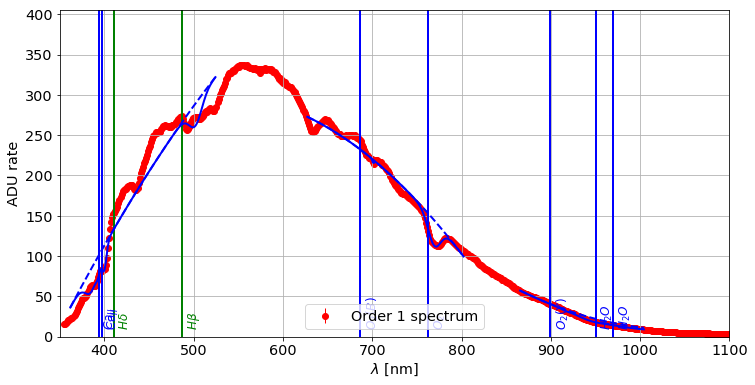

2018-03-29 15:16:47  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_217_spectrum.fits
2018-03-29 15:16:47  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:16:47  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_218.fits...
2018-03-29 15:16:47  Image      load                 INFO   
	Image loaded
2018-03-29 15:16:47  Image      load                 INFO   
	Loading disperser HoloPhAg...


spectrum  89
Load disperser HoloPhAg:
	from ../../Spectractor/dispersers/HoloPhAg
Hologram characteristics:
	N = 348.76 +/- 1.13 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1044.2 and y0 = 606.7 with average tilt of -1.9 degrees
Order  0 position at x0 = 779.6 and y0 = 614.7
Order +1 position at x0 = 1308.7 and y0 = 598.7
Distance between the orders: 529.36 pixels (12.70 mm)


2018-03-29 15:16:48  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_9     SP_BIBCODE_9   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:16:48  Image      find_target          INFO   
	X,Y target position in pixels: 779.489,696.459
2018-03-29 15:16:48  Image      compute_rotation_angle_hessian WARNING 
	Interpolated angle and fitted angle disagrees with more than 10 pixels over 2048 pixels:  -1.99 vs -1.53
2018-03-29 15:16:48  Image      turn_image           INFO   
	Rotate the image with angle theta=-1.99 degree
2018-03-29 15:16:50  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:16:51  Image      find_target          INFO   
	X,Y target position in pixels: 824.772,723.237
2018-03-29 15:16:51  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:16:51  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:16:51  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:16:52  S

   Line   Tabulated Detected   Shift     FWHM  Amplitude   SNR  
              nm       nm        nm       nm                    
--------- --------- -------- --------- ------- --------- -------
$H\gamma$     434.0  432.736  -1.26427 13.2314  -22.5333 31.2474
 $H\beta$     486.3  488.695   2.39505 4.02867  -14.0066 19.4232
$H\alpha$     656.3  656.196 -0.104416 4.12913  -11.5383 17.5161
 $O_2(B)$   686.719  689.198   2.47868 5.55543  -12.8341 19.4833
    $O_2$     762.1  761.779 -0.320547 7.34308  -34.7487 65.5921
 $O_2(Y)$   898.765  906.142    7.3769 5.70958   -2.9009 6.43714
  $H_2 O$     970.0  975.814   5.81444  27.475  -2.73287 6.70355


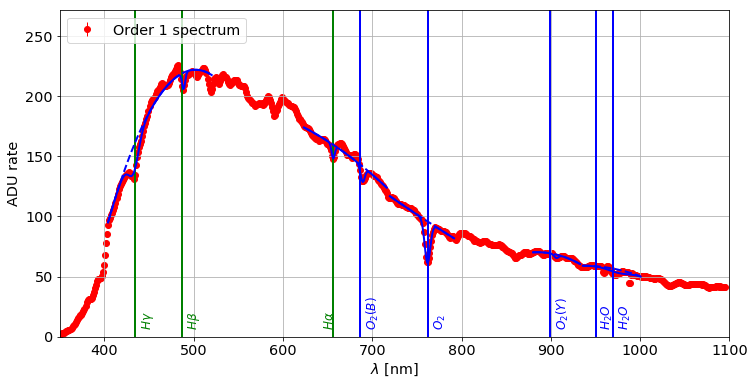

2018-03-29 15:16:52  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_218_spectrum.fits
2018-03-29 15:16:52  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:16:52  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_219.fits...
2018-03-29 15:16:52  Image      load                 INFO   
	Image loaded
2018-03-29 15:16:52  Image      load                 INFO   
	Loading disperser HoloAmAg...


spectrum  121
Load disperser HoloAmAg:
	from ../../Spectractor/dispersers/HoloAmAg
Hologram characteristics:
	N = 348.73 +/- 1.14 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1070.9 and y0 = 586.1 with average tilt of -1.9 degrees
Order  0 position at x0 = 805.1 and y0 = 595.0
Order +1 position at x0 = 1336.6 and y0 = 577.3
Distance between the orders: 531.79 pixels (12.76 mm)


2018-03-29 15:16:53  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_10    SP_BIBCODE_10   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:16:53  Image      find_target          INFO   
	X,Y target position in pixels: 779.164,696.213
2018-03-29 15:16:53  Image      turn_image           INFO   
	Rotate the image with angle theta=-1.47 degree
2018-03-29 15:16:55  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:16:55  Image      find_target          INFO   
	X,Y target position in pixels: 813.698,716.056
2018-03-29 15:16:55  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:16:55  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:16:55  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:16:56  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: -6.36nm (after 6 steps)
	with D = 56.04 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, 3.1 sigma shift)


   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366  379.991 -13.3755  16.485 -0.759031 4.40761
$Ca_{II}$   396.847  397.456 0.609066  16.485  -1.50471 8.73768
$H\gamma$     434.0  427.645 -6.35495  16.485  -1.56947 9.11373
$H\alpha$     656.3  634.952 -21.3477  16.485   -2.8273 6.87563
 $O_2(B)$   686.719  689.169  2.45026 4.41294  -3.84571 9.35228
    $O_2$     762.1  762.924  0.82401 8.99942  -16.3427 44.8116
 $O_2(Z)$   822.696  824.095  1.39902 11.9009 -0.901388 3.06142
 $O_2(Y)$   898.765  903.199  4.43372 15.5058  -0.71117 3.39831


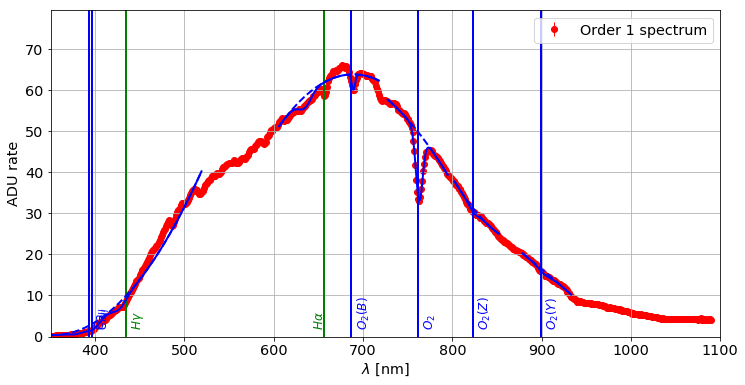

2018-03-29 15:16:57  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_219_spectrum.fits
2018-03-29 15:16:57  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:16:57  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_220.fits...
2018-03-29 15:16:57  Image      load                 INFO   
	Image loaded
2018-03-29 15:16:57  Image      load                 INFO   
	Loading disperser Ron400...


spectrum  219
Load disperser Ron400:
	from ../../Spectractor/dispersers/Ron400
Grating characteristics:
	N = 400.87 +/- 1.28 grooves/mm
	Average tilt of -0.3 degrees


2018-03-29 15:16:57  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_11    SP_BIBCODE_11   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:16:58  Image      find_target          INFO   
	X,Y target position in pixels: 778.870,696.138
2018-03-29 15:16:58  Image      compute_rotation_angle_hessian WARNING 
	Interpolated angle and fitted angle disagrees with more than 10 pixels over 2048 pixels:  -0.69 vs -0.28
2018-03-29 15:16:58  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.69 degree
2018-03-29 15:17:00  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:17:00  Image      find_target          INFO   
	X,Y target position in pixels: 794.647,705.381
2018-03-29 15:17:00  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:17:00  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:17:00  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:17:05  S

   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366  365.781 -27.5854  16.485  -16.4702  25.218
$Ca_{II}$   396.847  388.257 -8.59004  16.485  -16.9652  25.976
$H\delta$     410.2   400.55 -9.65027 8.35769  -16.7171 25.5961
$H\gamma$     434.0  438.501  4.50131 7.70362  -7.19021 11.0092
 $H\beta$     486.3  474.038 -12.2618  16.485  -5.02752  7.6978
$H\alpha$     656.3  660.692  4.39195 5.62051  -3.19115 3.21358
 $O_2(B)$   686.719  697.034   10.315 16.0848  -3.84023 3.86722
    $O_2$     762.1  766.876  4.77566  8.2472  -9.89234 11.8974
  $H_2 O$     950.0  946.146 -3.85367 31.1034  -1.87899 5.95334
  $H_2 O$     970.0  979.801  9.80092 55.5282  -1.38733 4.39558


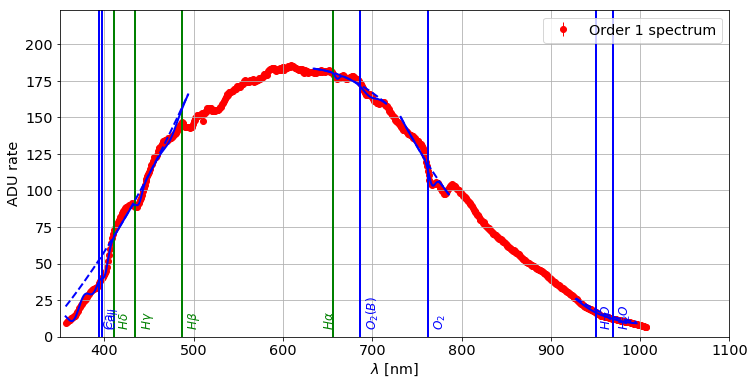

2018-03-29 15:17:06  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_220_spectrum.fits
2018-03-29 15:17:06  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:17:06  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_221.fits...
2018-03-29 15:17:06  Image      load                 INFO   
	Image loaded
2018-03-29 15:17:06  Image      load                 INFO   
	Loading disperser Thor300...


spectrum  4
Load disperser Thor300:
	from ../../Spectractor/dispersers/Thor300
Grating characteristics:
	N = 299.51 +/- 0.99 grooves/mm
	Average tilt of -0.6 degrees
 MAIN_ID        RA           DEC      ... SP_QUAL_12    SP_BIBCODE_12   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits


2018-03-29 15:17:07  spectractor Spectractor          INFO   
	Search for the target in the image...


Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:17:07  Image      find_target          INFO   
	X,Y target position in pixels: 778.905,696.911
2018-03-29 15:17:07  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.69 degree
2018-03-29 15:17:09  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:17:09  Image      find_target          INFO   
	X,Y target position in pixels: 794.871,706.414
2018-03-29 15:17:09  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:17:09  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:17:09  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:17:10  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: -3.19nm (after 10 steps)
	with D = 55.80 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, 1.8 sigma shift)


 Line Tabulated Detected   Shift     FWHM  Amplitude   SNR  
          nm       nm        nm       nm                    
----- --------- -------- ---------- ------ --------- -------
$O_2$     762.1  762.084 -0.0155205 16.485   -45.445 20.3583


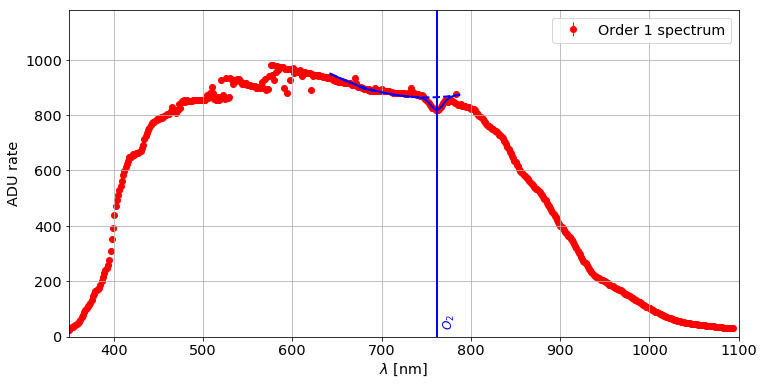

2018-03-29 15:17:10  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_221_spectrum.fits
2018-03-29 15:17:10  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:17:10  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_222.fits...


spectrum  68


2018-03-29 15:17:10  Image      load                 INFO   
	Image loaded
2018-03-29 15:17:10  Image      load                 INFO   
	Loading disperser HoloPhP...


Load disperser HoloPhP:
	from ../../Spectractor/dispersers/HoloPhP
Hologram characteristics:
	N = 355.08 +/- 1.15 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.0 degrees
	Hologram center at x0 = 856.0 and y0 = 562.3 with average tilt of -1.0 degrees
Order  0 position at x0 = 590.7 and y0 = 567.2
Order +1 position at x0 = 1121.3 and y0 = 557.5
Distance between the orders: 530.76 pixels (12.74 mm)


2018-03-29 15:17:11  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_13    SP_BIBCODE_13   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:17:11  Image      find_target          INFO   
	X,Y target position in pixels: 779.149,695.674
2018-03-29 15:17:11  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.98 degree
2018-03-29 15:17:13  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:17:14  Image      find_target          INFO   
	X,Y target position in pixels: 802.015,709.001
2018-03-29 15:17:14  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:17:14  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:17:14  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:17:14  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: 1.87nm (after 3 steps)
	with D = 55.30 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, -0.8 sigma shift)


   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366  381.483 -11.8828  16.485  -31.0033 30.3099
$Ca_{II}$   396.847  395.023 -1.82375 8.29868  -29.4645 28.8055
 $H\beta$     486.3   498.08    11.78  16.485  -29.7817 29.1156
$H\alpha$     656.3  658.769  2.46868 11.6325  -10.0276 8.53591
 $O_2(B)$   686.719  691.463  4.74408 11.5085   -9.7443 8.29475
    $O_2$     762.1  764.112  2.01234 15.4945  -26.5567 29.2424


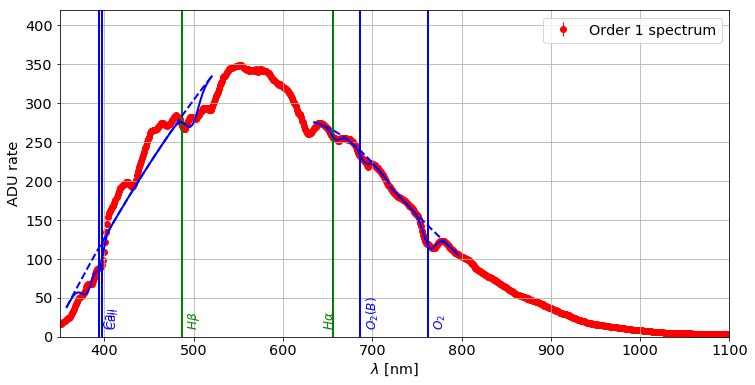

2018-03-29 15:17:15  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_222_spectrum.fits
2018-03-29 15:17:15  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:17:15  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_223.fits...
2018-03-29 15:17:15  Image      load                 INFO   
	Image loaded
2018-03-29 15:17:15  Image      load                 INFO   
	Loading disperser HoloPhAg...


spectrum  211
Load disperser HoloPhAg:
	from ../../Spectractor/dispersers/HoloPhAg
Hologram characteristics:
	N = 348.76 +/- 1.13 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1044.2 and y0 = 606.7 with average tilt of -1.9 degrees
Order  0 position at x0 = 779.6 and y0 = 614.7
Order +1 position at x0 = 1308.7 and y0 = 598.7
Distance between the orders: 529.36 pixels (12.70 mm)


2018-03-29 15:17:15  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_14    SP_BIBCODE_14   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:17:15  Image      find_target          INFO   
	X,Y target position in pixels: 779.555,695.496
2018-03-29 15:17:16  Image      compute_rotation_angle_hessian WARNING 
	Interpolated angle and fitted angle disagrees with more than 10 pixels over 2048 pixels:  -2.00 vs -1.53
2018-03-29 15:17:16  Image      turn_image           INFO   
	Rotate the image with angle theta=-2.00 degree
2018-03-29 15:17:18  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:17:18  Image      find_target          INFO   
	X,Y target position in pixels: 825.062,722.260
2018-03-29 15:17:18  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:17:18  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:17:18  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:17:18  S

   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$H\gamma$     434.0  432.409 -1.59097 13.4872  -21.3916 29.9264
 $H\beta$     486.3  488.576  2.27644 4.25437  -13.4903 18.8726
$H\alpha$     656.3  655.953 -0.34675 5.72849  -10.9695 16.8236
 $O_2(B)$   686.719  689.429  2.71035 5.64868  -12.4359 19.0727
    $O_2$     762.1  762.238 0.137634 7.51188  -33.2263 63.0087
 $O_2(Y)$   898.765  907.236  8.47098 5.13856  -1.75281 4.07501
  $H_2 O$     950.0  937.195 -12.8055 14.7028  -4.70324 10.9343
  $H_2 O$     970.0  977.667  7.66722 27.1643  -2.49133 5.79197


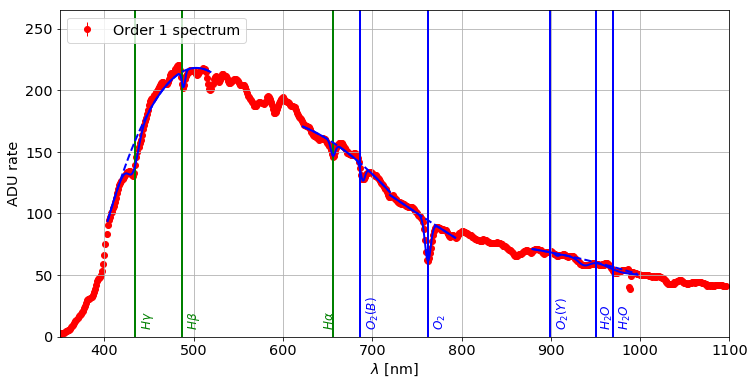

2018-03-29 15:17:19  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_223_spectrum.fits
2018-03-29 15:17:19  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:17:19  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_224.fits...
2018-03-29 15:17:19  Image      load                 INFO   
	Image loaded
2018-03-29 15:17:19  Image      load                 INFO   
	Loading disperser HoloAmAg...


spectrum  193
Load disperser HoloAmAg:
	from ../../Spectractor/dispersers/HoloAmAg
Hologram characteristics:
	N = 348.73 +/- 1.14 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1070.9 and y0 = 586.1 with average tilt of -1.9 degrees
Order  0 position at x0 = 805.1 and y0 = 595.0
Order +1 position at x0 = 1336.6 and y0 = 577.3
Distance between the orders: 531.79 pixels (12.76 mm)


2018-03-29 15:17:20  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_15    SP_BIBCODE_15   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:17:20  Image      find_target          INFO   
	X,Y target position in pixels: 778.777,694.801
2018-03-29 15:17:20  Image      turn_image           INFO   
	Rotate the image with angle theta=-1.47 degree
2018-03-29 15:17:22  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:17:22  Image      find_target          INFO   
	X,Y target position in pixels: 813.353,714.694
2018-03-29 15:17:22  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:17:22  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:17:22  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:17:23  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: -6.17nm (after 8 steps)
	with D = 55.99 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, 2.8 sigma shift)


   Line   Tabulated Detected   Shift     FWHM  Amplitude   SNR  
              nm       nm        nm       nm                    
--------- --------- -------- --------- ------- --------- -------
$Ca_{II}$   393.366  372.692  -20.6737  16.485 -0.681706 3.93208
$Ca_{II}$   396.847   388.24  -8.60727 15.2787  -1.37773 7.94676
$H\delta$     410.2  402.796  -7.40364  16.485  -1.51997 8.76716
$H\gamma$     434.0  428.322  -5.67834  16.485  -1.79421  10.349
$H\alpha$     656.3  656.375 0.0744834 5.51192  -3.46833  8.3293
 $O_2(B)$   686.719   689.04   2.32078 5.62582  -4.58844 11.0193
    $O_2$     762.1  762.859   0.75928 8.49711  -16.6945 45.4831


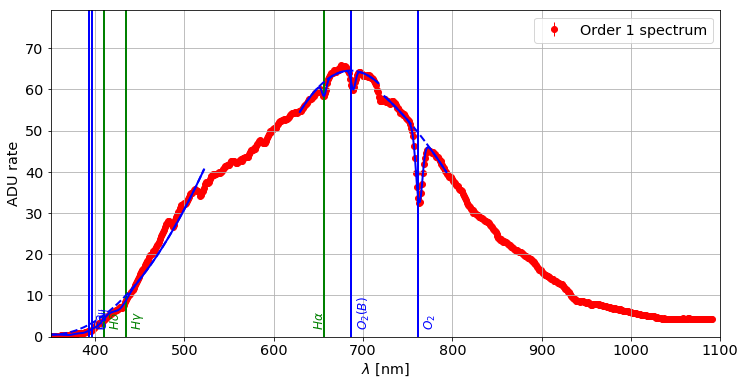

2018-03-29 15:17:24  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_224_spectrum.fits
2018-03-29 15:17:24  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:17:24  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_225.fits...
2018-03-29 15:17:24  Image      load                 INFO   
	Image loaded
2018-03-29 15:17:24  Image      load                 INFO   
	Loading disperser Ron400...


spectrum  183
Load disperser Ron400:
	from ../../Spectractor/dispersers/Ron400
Grating characteristics:
	N = 400.87 +/- 1.28 grooves/mm
	Average tilt of -0.3 degrees


2018-03-29 15:17:24  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_16    SP_BIBCODE_16   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:17:25  Image      find_target          INFO   
	X,Y target position in pixels: 779.068,694.629
2018-03-29 15:17:25  Image      compute_rotation_angle_hessian WARNING 
	Interpolated angle and fitted angle disagrees with more than 10 pixels over 2048 pixels:  -0.68 vs -0.28
2018-03-29 15:17:25  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.68 degree
2018-03-29 15:17:27  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:17:27  Image      find_target          INFO   
	X,Y target position in pixels: 794.877,703.881
2018-03-29 15:17:27  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:17:27  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:17:27  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:17:39  S

   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366  361.893 -31.4726  16.485  -15.5866 23.4142
$Ca_{II}$   396.847  386.351 -10.4956  16.485  -18.2511 27.4167
$H\gamma$     434.0  432.152 -1.84837 5.85743  -4.69756 7.05666
 $H\beta$     486.3  488.192  1.89167  16.485  -15.9997 24.0348
 $O_2(B)$   686.719  691.897  5.17785 14.1825  -3.19424 3.32412
    $O_2$     762.1  762.936 0.835939  16.485  -8.14044 10.4948


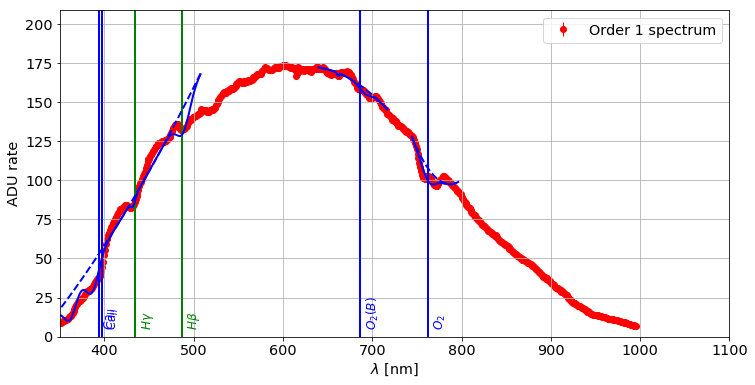

2018-03-29 15:17:40  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_225_spectrum.fits
2018-03-29 15:17:40  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:17:40  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_226.fits...
2018-03-29 15:17:40  Image      load                 INFO   
	Image loaded
2018-03-29 15:17:40  Image      load                 INFO   
	Loading disperser Thor300...


spectrum  76
Load disperser Thor300:
	from ../../Spectractor/dispersers/Thor300
Grating characteristics:
	N = 299.51 +/- 0.99 grooves/mm
	Average tilt of -0.6 degrees


2018-03-29 15:17:40  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_17    SP_BIBCODE_17   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:17:41  Image      find_target          INFO   
	X,Y target position in pixels: 779.098,695.883
2018-03-29 15:17:41  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.67 degree
2018-03-29 15:17:43  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:17:43  Image      find_target          WARNING 
	X position determination of the target probably wrong
2018-03-29 15:17:43  Image      find_target          INFO   
	X,Y target position in pixels: 794.946,705.281
2018-03-29 15:17:43  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:17:43  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:17:43  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:17:44  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght t

 Line Tabulated Detected   Shift      FWHM  Amplitude   SNR  
          nm       nm        nm        nm                    
----- --------- -------- ---------- ------- --------- -------
$O_2$     762.1  762.008 -0.0916378 13.2479  -39.5079 17.8331


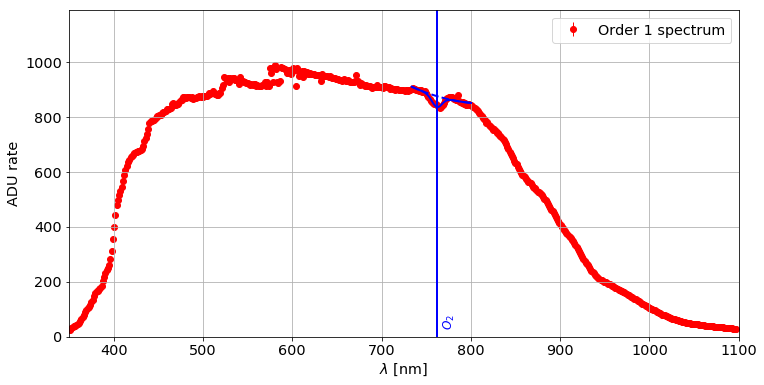

2018-03-29 15:17:44  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_226_spectrum.fits
2018-03-29 15:17:44  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:17:44  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_227.fits...


spectrum  276


2018-03-29 15:17:45  Image      load                 INFO   
	Image loaded
2018-03-29 15:17:45  Image      load                 INFO   
	Loading disperser HoloPhP...


Load disperser HoloPhP:
	from ../../Spectractor/dispersers/HoloPhP
Hologram characteristics:
	N = 355.08 +/- 1.15 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.0 degrees
	Hologram center at x0 = 856.0 and y0 = 562.3 with average tilt of -1.0 degrees
Order  0 position at x0 = 590.7 and y0 = 567.2
Order +1 position at x0 = 1121.3 and y0 = 557.5
Distance between the orders: 530.76 pixels (12.74 mm)


2018-03-29 15:17:45  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_18    SP_BIBCODE_18   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:17:45  Image      find_target          INFO   
	X,Y target position in pixels: 777.894,694.438
2018-03-29 15:17:45  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.93 degree
2018-03-29 15:17:48  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:17:48  Image      find_target          INFO   
	X,Y target position in pixels: 799.480,706.985
2018-03-29 15:17:48  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:17:48  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:17:48  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:17:48  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: 2.61nm (after 2 steps)
	with D = 55.28 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, -0.9 sigma shift)


   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366  381.617 -11.7491  16.485  -28.6769 28.9722
$Ca_{II}$   396.847  395.398 -1.44917 8.44894  -27.2006 27.4807
 $H\beta$     486.3  498.252  11.9524  16.485  -28.1254 28.4151
    $O_2$     762.1  763.865  1.76526  16.485  -31.2451 29.9929


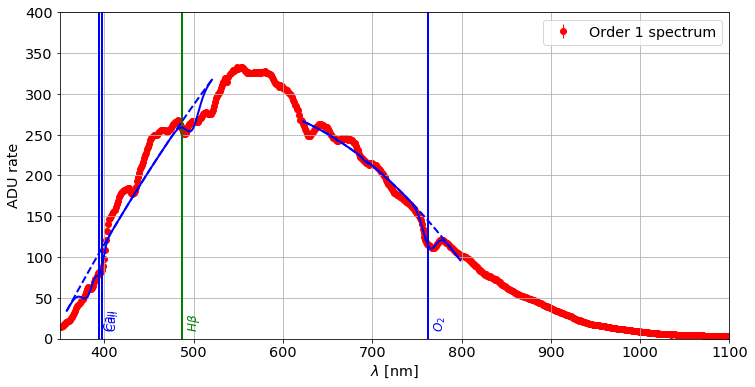

2018-03-29 15:17:49  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_227_spectrum.fits
2018-03-29 15:17:49  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:17:49  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_228.fits...
2018-03-29 15:17:49  Image      load                 INFO   
	Image loaded
2018-03-29 15:17:49  Image      load                 INFO   
	Loading disperser HoloPhAg...


spectrum  237
Load disperser HoloPhAg:
	from ../../Spectractor/dispersers/HoloPhAg
Hologram characteristics:
	N = 348.76 +/- 1.13 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1044.2 and y0 = 606.7 with average tilt of -1.9 degrees
Order  0 position at x0 = 779.6 and y0 = 614.7
Order +1 position at x0 = 1308.7 and y0 = 598.7
Distance between the orders: 529.36 pixels (12.70 mm)


2018-03-29 15:17:49  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_19    SP_BIBCODE_19   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:17:50  Image      find_target          INFO   
	X,Y target position in pixels: 778.521,693.971
2018-03-29 15:17:50  Image      compute_rotation_angle_hessian WARNING 
	Interpolated angle and fitted angle disagrees with more than 10 pixels over 2048 pixels:  -1.99 vs -1.53
2018-03-29 15:17:50  Image      turn_image           INFO   
	Rotate the image with angle theta=-1.99 degree
2018-03-29 15:17:52  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:17:52  Image      find_target          INFO   
	X,Y target position in pixels: 824.062,720.649
2018-03-29 15:17:52  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:17:52  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:17:52  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:17:53  S

   Line   Tabulated Detected   Shift      FWHM  Amplitude   SNR  
              nm       nm        nm        nm                    
--------- --------- -------- ---------- ------- --------- -------
$H\gamma$     434.0  432.217   -1.78329  12.685  -19.7011 28.3034
 $H\beta$     486.3   488.65       2.35 4.34534  -14.3303 20.5875
$H\alpha$     656.3  656.235 -0.0651129 4.98864  -11.1341  17.591
 $O_2(B)$   686.719  689.375    2.65606 5.28744  -12.5123 19.7684
    $O_2$     762.1  762.296   0.196168 7.28097  -31.7073 62.3928
 $O_2(Z)$   822.696  832.819    10.1226 6.40491  -1.61987 3.52264
 $O_2(Y)$   898.765  907.318    8.55276 5.51946  -1.62623 3.97496
  $H_2 O$     950.0  937.062   -12.9384 13.4457  -4.18955 10.2404
  $H_2 O$     970.0  972.876    2.87635  11.775  -2.55813 6.25277


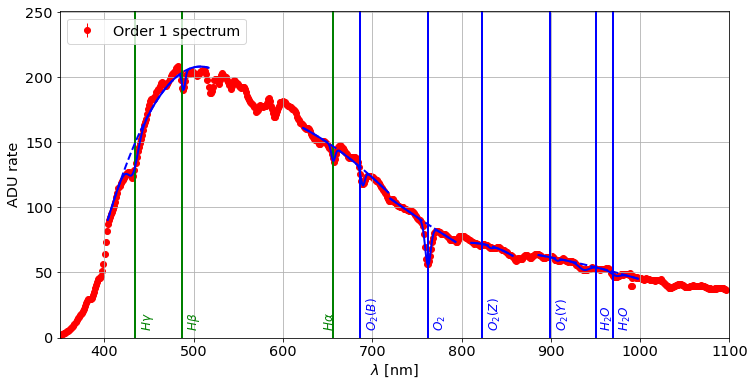

2018-03-29 15:17:53  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_228_spectrum.fits
2018-03-29 15:17:53  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:17:53  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_229.fits...
2018-03-29 15:17:53  Image      load                 INFO   
	Image loaded
2018-03-29 15:17:53  Image      load                 INFO   
	Loading disperser HoloAmAg...


spectrum  83
Load disperser HoloAmAg:
	from ../../Spectractor/dispersers/HoloAmAg
Hologram characteristics:
	N = 348.73 +/- 1.14 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1070.9 and y0 = 586.1 with average tilt of -1.9 degrees
Order  0 position at x0 = 805.1 and y0 = 595.0
Order +1 position at x0 = 1336.6 and y0 = 577.3
Distance between the orders: 531.79 pixels (12.76 mm)


2018-03-29 15:17:54  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_20    SP_BIBCODE_20   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:17:54  Image      find_target          INFO   
	X,Y target position in pixels: 778.103,693.689
2018-03-29 15:17:54  Image      turn_image           INFO   
	Rotate the image with angle theta=-1.47 degree
2018-03-29 15:17:57  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:17:57  Image      find_target          INFO   
	X,Y target position in pixels: 812.751,713.553
2018-03-29 15:17:57  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:17:57  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:17:57  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:17:59  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: -6.07nm (after 5 steps)
	with D = 56.02 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, 3.0 sigma shift)


   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366  383.303  -10.063 2.80584 -0.358238 3.33864
$Ca_{II}$   396.847  386.004 -10.8426 3.93643 -0.385138 3.58934
$H\delta$     410.2  396.099 -14.1012  16.485 -0.758588 7.06974
$H\gamma$     434.0  429.755 -4.24497  16.485  -1.37149 12.7818
 $H\beta$     486.3  487.941  1.64059 5.41801  -2.28905  7.9834
$H\alpha$     656.3  634.872  -21.428  16.485  -2.67058 6.46755
 $O_2(B)$   686.719  689.146  2.42717 4.45699  -3.91929 9.49165
    $O_2$     762.1  763.145  1.04474 8.33197  -16.6311  45.332
  $H_2 O$     950.0  955.763  5.76261  11.775 -0.659068 4.23305
  $H_2 O$     970.0  957.276 -12.7237  11.775 -0.629548 4.04345


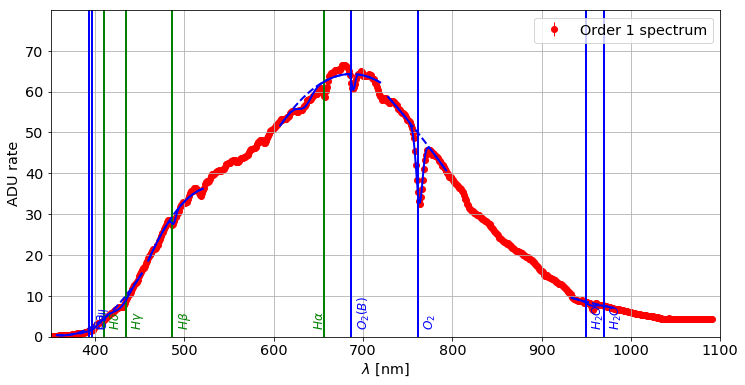

2018-03-29 15:17:59  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_229_spectrum.fits
2018-03-29 15:18:00  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:18:00  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_230.fits...
2018-03-29 15:18:00  Image      load                 INFO   
	Image loaded
2018-03-29 15:18:00  Image      load                 INFO   
	Loading disperser Ron400...


spectrum  111
Load disperser Ron400:
	from ../../Spectractor/dispersers/Ron400
Grating characteristics:
	N = 400.87 +/- 1.28 grooves/mm
	Average tilt of -0.3 degrees


2018-03-29 15:18:00  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_21    SP_BIBCODE_21   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:18:00  Image      find_target          INFO   
	X,Y target position in pixels: 777.422,694.008
2018-03-29 15:18:00  Image      compute_rotation_angle_hessian WARNING 
	Interpolated angle and fitted angle disagrees with more than 10 pixels over 2048 pixels:  -0.69 vs -0.28
2018-03-29 15:18:00  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.69 degree
2018-03-29 15:18:03  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:18:03  Image      find_target          INFO   
	X,Y target position in pixels: 793.751,703.196
2018-03-29 15:18:03  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:18:03  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:18:03  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:18:20  S

   Line   Tabulated Detected  Shift    FWHM  Amplitude   SNR  
              nm       nm       nm      nm                    
--------- --------- -------- -------- ------ --------- -------
$H\delta$     410.2   384.02 -26.1805 16.485  -12.6148 17.9983
 $H\beta$     486.3  490.229  3.92877 16.485  -8.36272 11.9316
    $O_2$     762.1  762.937 0.837029 16.485  -20.5319 28.7925
 $O_2(Z)$   822.696  832.756  10.0596 16.485  -3.55024  4.9786


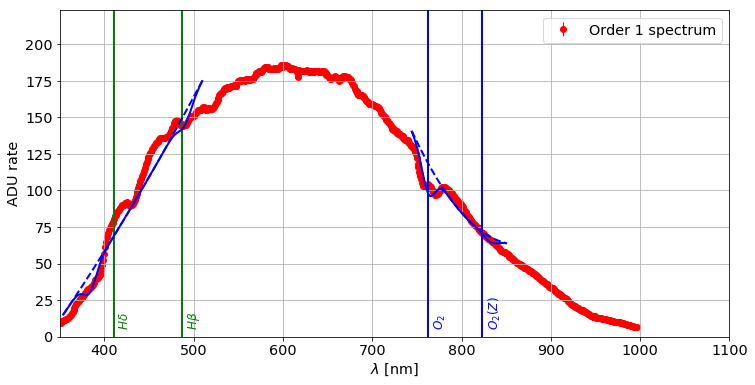

2018-03-29 15:18:20  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_230_spectrum.fits
2018-03-29 15:18:20  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:18:20  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_231.fits...
2018-03-29 15:18:20  Image      load                 INFO   
	Image loaded
2018-03-29 15:18:20  Image      load                 INFO   
	Loading disperser Thor300...


spectrum  267
Load disperser Thor300:
	from ../../Spectractor/dispersers/Thor300
Grating characteristics:
	N = 299.51 +/- 0.99 grooves/mm
	Average tilt of -0.6 degrees
 MAIN_ID        RA           DEC      ... SP_QUAL_22    SP_BIBCODE_22   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits


2018-03-29 15:18:21  spectractor Spectractor          INFO   
	Search for the target in the image...


Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:18:21  Image      find_target          INFO   
	X,Y target position in pixels: 777.557,694.948
2018-03-29 15:18:21  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.73 degree
2018-03-29 15:18:23  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:18:24  Image      find_target          INFO   
	X,Y target position in pixels: 794.821,705.145
2018-03-29 15:18:24  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:18:24  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:18:24  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:18:24  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: -1.50nm (after 4 steps)
	with D = 55.66 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, 1.1 sigma shift)


  Line   Tabulated Detected   Shift     FWHM  Amplitude   SNR  
             nm       nm        nm       nm                    
-------- --------- -------- --------- ------- --------- -------
$O_2(B)$   686.719  684.903  -1.81647 7.99641  -9.68711 4.18935
   $O_2$     762.1  762.145 0.0454444 12.3919  -43.1919 19.1811


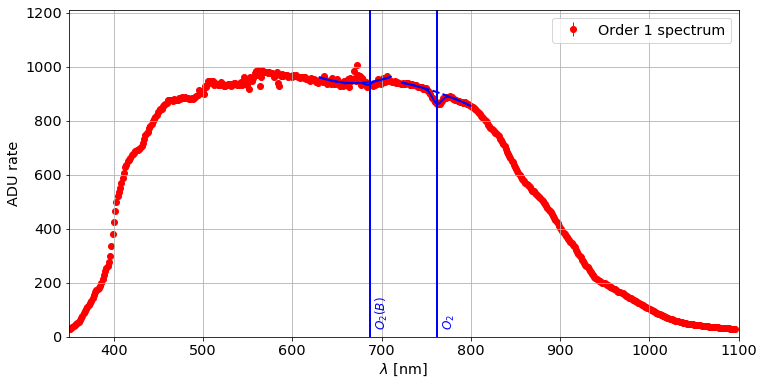

2018-03-29 15:18:24  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_231_spectrum.fits
2018-03-29 15:18:24  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:18:24  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_232.fits...


spectrum  84


2018-03-29 15:18:25  Image      load                 INFO   
	Image loaded
2018-03-29 15:18:25  Image      load                 INFO   
	Loading disperser HoloPhP...


Load disperser HoloPhP:
	from ../../Spectractor/dispersers/HoloPhP
Hologram characteristics:
	N = 355.08 +/- 1.15 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.0 degrees
	Hologram center at x0 = 856.0 and y0 = 562.3 with average tilt of -1.0 degrees
Order  0 position at x0 = 590.7 and y0 = 567.2
Order +1 position at x0 = 1121.3 and y0 = 557.5
Distance between the orders: 530.76 pixels (12.74 mm)


2018-03-29 15:18:25  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_23    SP_BIBCODE_23   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:18:26  Image      find_target          INFO   
	X,Y target position in pixels: 777.693,692.896
2018-03-29 15:18:26  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.97 degree
2018-03-29 15:18:28  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:18:28  Image      find_target          INFO   
	X,Y target position in pixels: 800.639,706.240
2018-03-29 15:18:28  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:18:28  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:18:28  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:18:30  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: 7.55nm (after 14 steps)
	with D = 54.89 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, -2.9 sigma shift)


   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366  385.437  -7.9291  16.485  -30.4256 29.4434
$Ca_{II}$   396.847  393.172 -3.67532 6.20822  -27.2366 26.3574
$H\delta$     410.2  399.807 -10.3926 5.45411  -31.3376  30.326
 $H\beta$     486.3  503.977  17.6774  16.485  -30.0044 29.0359
$H\alpha$     656.3  666.418   10.118 11.9747  -9.04437   7.695
 $O_2(B)$   686.719   696.56  9.84066 9.46416   -7.6977 6.54925
    $O_2$     762.1  769.035  6.93509 12.9024  -19.4346 22.3998
 $O_2(Y)$   898.765  871.276 -27.4888  16.485  -2.19492 5.01601
  $H_2 O$     950.0  945.374 -4.62563 26.0096  -2.78605  6.3669
  $H_2 O$     970.0  979.179  9.17874   70.65  -1.84976 4.22722


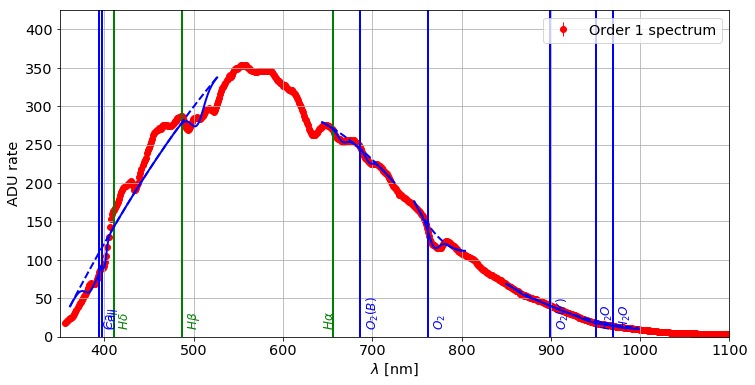

2018-03-29 15:18:30  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_232_spectrum.fits
2018-03-29 15:18:30  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:18:30  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_233.fits...
2018-03-29 15:18:30  Image      load                 INFO   
	Image loaded
2018-03-29 15:18:30  Image      load                 INFO   
	Loading disperser HoloPhAg...


spectrum  112
Load disperser HoloPhAg:
	from ../../Spectractor/dispersers/HoloPhAg
Hologram characteristics:
	N = 348.76 +/- 1.13 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1044.2 and y0 = 606.7 with average tilt of -1.9 degrees
Order  0 position at x0 = 779.6 and y0 = 614.7
Order +1 position at x0 = 1308.7 and y0 = 598.7
Distance between the orders: 529.36 pixels (12.70 mm)


2018-03-29 15:18:31  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_24    SP_BIBCODE_24   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:18:31  Image      find_target          INFO   
	X,Y target position in pixels: 779.052,692.300
2018-03-29 15:18:31  Image      compute_rotation_angle_hessian WARNING 
	Interpolated angle and fitted angle disagrees with more than 10 pixels over 2048 pixels:  -2.02 vs -1.54
2018-03-29 15:18:31  Image      turn_image           INFO   
	Rotate the image with angle theta=-2.02 degree
2018-03-29 15:18:33  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:18:34  Image      find_target          INFO   
	X,Y target position in pixels: 825.199,719.450
2018-03-29 15:18:34  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:18:34  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:18:34  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:18:34  S

   Line   Tabulated Detected   Shift     FWHM  Amplitude   SNR  
              nm       nm        nm       nm                    
--------- --------- -------- --------- ------- --------- -------
$H\gamma$     434.0   432.21  -1.78963 13.0086    -19.24 27.6782
 $H\beta$     486.3  488.737   2.43653 5.00806  -13.0029 18.7057
$H\alpha$     656.3  656.035 -0.264753 4.13926    -8.643 14.9216
 $O_2(B)$   686.719  689.125    2.4063 3.33573   -6.6285 11.4437
    $O_2$     762.1  762.371  0.271398 8.04333  -31.4919 54.3688
 $O_2(Y)$   898.765  907.686   8.92146 5.42755  -1.94333 4.74023
  $H_2 O$     950.0  937.512  -12.4882 16.1305   -4.3648 10.6468
  $H_2 O$     970.0  972.791   2.79121  11.775  -3.73483  9.1101


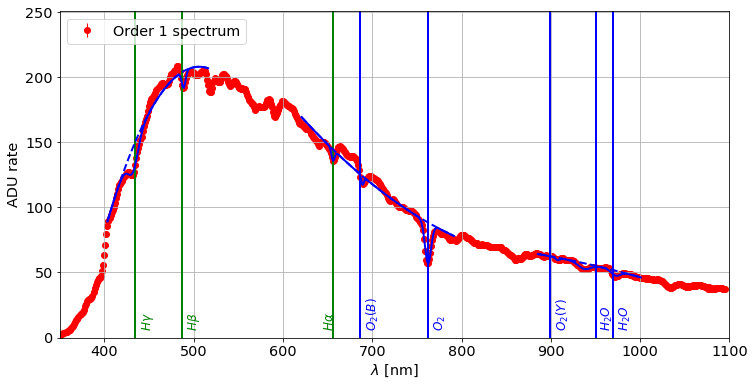

2018-03-29 15:18:35  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_233_spectrum.fits
2018-03-29 15:18:35  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:18:35  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_234.fits...
2018-03-29 15:18:35  Image      load                 INFO   
	Image loaded
2018-03-29 15:18:35  Image      load                 INFO   
	Loading disperser HoloAmAg...


spectrum  207
Load disperser HoloAmAg:
	from ../../Spectractor/dispersers/HoloAmAg
Hologram characteristics:
	N = 348.73 +/- 1.14 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1070.9 and y0 = 586.1 with average tilt of -1.9 degrees
Order  0 position at x0 = 805.1 and y0 = 595.0
Order +1 position at x0 = 1336.6 and y0 = 577.3
Distance between the orders: 531.79 pixels (12.76 mm)


2018-03-29 15:18:35  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_25    SP_BIBCODE_25   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:18:35  Image      find_target          INFO   
	X,Y target position in pixels: 777.832,691.118
2018-03-29 15:18:36  Image      turn_image           INFO   
	Rotate the image with angle theta=-1.49 degree
2018-03-29 15:18:38  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:18:38  Image      find_target          INFO   
	X,Y target position in pixels: 813.181,711.337
2018-03-29 15:18:38  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:18:38  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:18:38  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:18:39  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: -6.70nm (after 8 steps)
	with D = 56.02 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, 3.0 sigma shift)


   Line   Tabulated Detected   Shift      FWHM  Amplitude   SNR  
              nm       nm        nm        nm                    
--------- --------- -------- ---------- ------- --------- -------
$Ca_{II}$   396.847  391.657   -5.18965  16.485 -0.706804 10.6892
 $H\beta$     486.3  486.828   0.528084 5.28499  -2.06246 7.30525
$H\alpha$     656.3  655.853  -0.446664  5.6324  -3.71137 9.00743
 $O_2(B)$   686.719  688.519     1.8001 5.91803  -4.04603 9.81966
    $O_2$     762.1  762.444   0.344344 8.27378  -14.9915 44.5631
 $O_2(Z)$   822.696   822.68 -0.0159797  16.485  -1.97747 5.87815
  $H_2 O$     970.0  956.231   -13.7692  11.775 -0.493408 3.20553


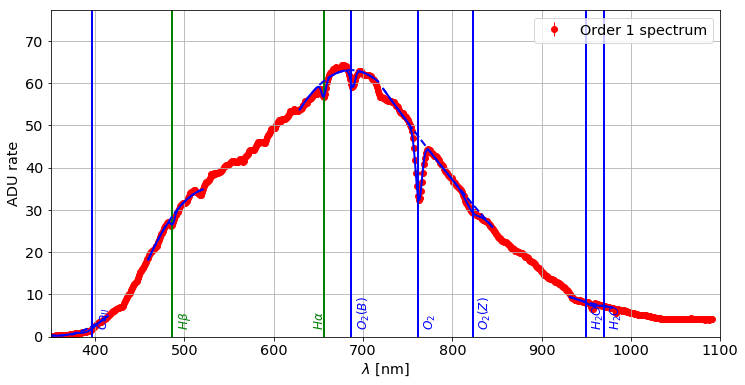

2018-03-29 15:18:39  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_234_spectrum.fits
2018-03-29 15:18:39  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:18:39  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_235.fits...
2018-03-29 15:18:39  Image      load                 INFO   
	Image loaded
2018-03-29 15:18:39  Image      load                 INFO   
	Loading disperser Ron400...


spectrum  119
Load disperser Ron400:
	from ../../Spectractor/dispersers/Ron400
Grating characteristics:
	N = 400.87 +/- 1.28 grooves/mm
	Average tilt of -0.3 degrees


2018-03-29 15:18:40  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_26    SP_BIBCODE_26   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:18:40  Image      find_target          INFO   
	X,Y target position in pixels: 777.067,691.937
2018-03-29 15:18:40  Image      compute_rotation_angle_hessian WARNING 
	Interpolated angle and fitted angle disagrees with more than 10 pixels over 2048 pixels:  -0.68 vs -0.28
2018-03-29 15:18:40  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.68 degree
2018-03-29 15:18:42  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:18:43  Image      find_target          INFO   
	X,Y target position in pixels: 792.770,700.176
2018-03-29 15:18:43  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:18:43  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:18:43  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:18:46  S

   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366   366.89 -26.4762  16.485  -13.6172 20.6163
$Ca_{II}$   396.847  391.761 -5.08599  16.485  -17.0624 25.8322
$H\gamma$     434.0  438.682  4.68231 7.43566  -6.21238 9.40545
 $H\beta$     486.3  474.039 -12.2613  16.485  -5.36045 8.11564
    $O_2$     762.1  771.964  9.86407  16.485  -14.9668 19.8778
  $H_2 O$     950.0  957.574  7.57373  18.679 -0.926636 3.12255


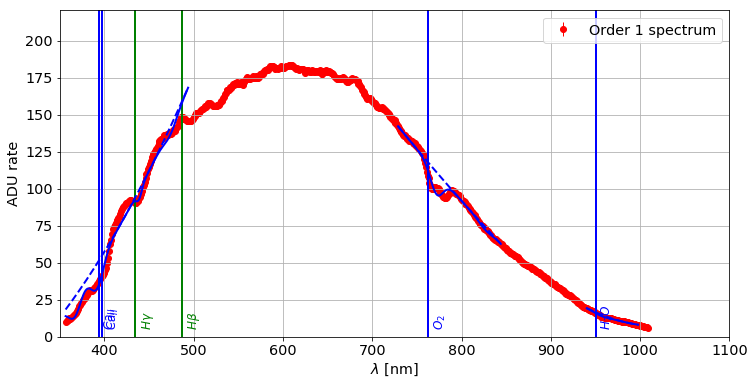

2018-03-29 15:18:46  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_235_spectrum.fits
2018-03-29 15:18:46  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:18:46  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_236.fits...
2018-03-29 15:18:46  Image      load                 INFO   
	Image loaded
2018-03-29 15:18:46  Image      load                 INFO   
	Loading disperser Thor300...


spectrum  54
Load disperser Thor300:
	from ../../Spectractor/dispersers/Thor300
Grating characteristics:
	N = 299.51 +/- 0.99 grooves/mm
	Average tilt of -0.6 degrees


2018-03-29 15:18:47  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_27    SP_BIBCODE_27   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:18:47  Image      find_target          INFO   
	X,Y target position in pixels: 777.172,691.548
2018-03-29 15:18:47  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.70 degree
2018-03-29 15:18:49  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:18:49  Image      find_target          INFO   
	X,Y target position in pixels: 793.836,701.125
2018-03-29 15:18:49  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:18:49  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:18:49  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:18:50  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: 0.52nm (after 3 steps)
	with D = 55.50 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, 0.2 sigma shift)


   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$H\alpha$     656.3  649.457 -6.84325 3.51099  -24.4279 10.7418
 $O_2(B)$   686.719  685.458 -1.26093 5.30724  -14.6678  6.4499
    $O_2$     762.1  764.173   2.0727 11.8392  -44.0117  19.882


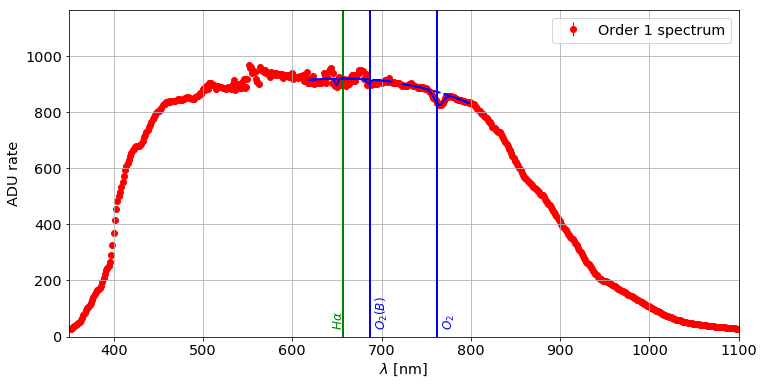

2018-03-29 15:18:50  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_236_spectrum.fits
2018-03-29 15:18:50  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:18:50  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_237.fits...


spectrum  133


2018-03-29 15:18:50  Image      load                 INFO   
	Image loaded
2018-03-29 15:18:50  Image      load                 INFO   
	Loading disperser HoloPhP...


Load disperser HoloPhP:
	from ../../Spectractor/dispersers/HoloPhP
Hologram characteristics:
	N = 355.08 +/- 1.15 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.0 degrees
	Hologram center at x0 = 856.0 and y0 = 562.3 with average tilt of -1.0 degrees
Order  0 position at x0 = 590.7 and y0 = 567.2
Order +1 position at x0 = 1121.3 and y0 = 557.5
Distance between the orders: 530.76 pixels (12.74 mm)


2018-03-29 15:18:51  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_28    SP_BIBCODE_28   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:18:51  Image      find_target          INFO   
	X,Y target position in pixels: 776.840,690.406
2018-03-29 15:18:51  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.95 degree
2018-03-29 15:18:53  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:18:53  Image      find_target          INFO   
	X,Y target position in pixels: 799.101,703.340
2018-03-29 15:18:53  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:18:53  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:18:53  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...
2018-03-29 15:18:54  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: 2.20nm (after 2 steps)
	with D = 55.28 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, -0.9 sigma shift)


   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366   381.59 -11.7757  16.485  -31.0619 30.4318
$Ca_{II}$   396.847  395.001 -1.84562 7.88171   -29.521 28.9221
 $H\beta$     486.3  498.218  11.9177  16.485  -30.3247 29.7095
    $O_2$     762.1  765.104  3.00372  16.485  -35.4624 36.2758
 $O_2(Z)$   822.696  801.616 -21.0798  16.485   -9.9965 10.2258


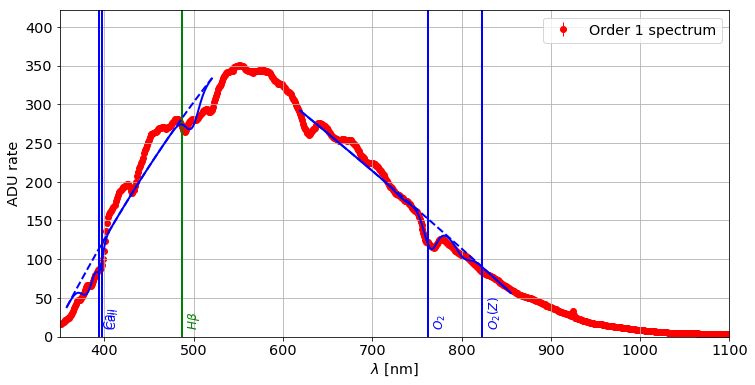

2018-03-29 15:18:55  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_237_spectrum.fits
2018-03-29 15:18:55  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-29 15:18:55  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_238.fits...
2018-03-29 15:18:55  Image      load                 INFO   
	Image loaded
2018-03-29 15:18:55  Image      load                 INFO   
	Loading disperser HoloPhAg...


spectrum  177
Load disperser HoloPhAg:
	from ../../Spectractor/dispersers/HoloPhAg
Hologram characteristics:
	N = 348.76 +/- 1.13 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1044.2 and y0 = 606.7 with average tilt of -1.9 degrees
Order  0 position at x0 = 779.6 and y0 = 614.7
Order +1 position at x0 = 1308.7 and y0 = 598.7
Distance between the orders: 529.36 pixels (12.70 mm)


2018-03-29 15:18:55  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_29    SP_BIBCODE_29   
             "h:m:s"       "d:m:s"    ...                               
--------- ------------- ------------- ... ---------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...          C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


2018-03-29 15:18:56  Image      find_target          INFO   
	X,Y target position in pixels: 777.804,689.596
2018-03-29 15:18:56  Image      compute_rotation_angle_hessian WARNING 
	Interpolated angle and fitted angle disagrees with more than 10 pixels over 2048 pixels:  -2.00 vs -1.54
2018-03-29 15:18:56  Image      turn_image           INFO   
	Rotate the image with angle theta=-2.00 degree
2018-03-29 15:18:58  spectractor Spectractor          INFO   
	Search for the target in the rotated image...
2018-03-29 15:18:58  Image      find_target          INFO   
	X,Y target position in pixels: 823.676,716.237
2018-03-29 15:18:58  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-29 15:18:58  Spectrum   __init__             INFO   
	Spectrum info copied from Image
2018-03-29 15:18:58  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...


RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

In [26]:
for index, row in filex0y0dxdy.iterrows():
    full_filename=os.path.join(inputdir,row['file'])
    x0,y0=row['Obj-posXpix'], row['Obj-posYpix']
    print 'spectrum ',index
    Spectractor(full_filename,outputdir,[x0,y0],object_name)